# 데이터 분석 및 전처리

- 데이터 연관성 분석
- 데이터 전처리

In [1]:
import re
from collections import Counter

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# 데이터 경로
PATH = 'open/external_open/'

In [3]:
AllCountry = pd.read_csv(PATH + 'countrywide_accident.csv')
Daegu = pd.read_csv('open/train.csv') 
result_set = pd.read_csv('open/test.csv')

## 데이터 인코딩
- 한글로 되어 있는 데이터를 정수로 인코딩

In [4]:
test_col = ['사고일시', '요일', '기상상태', '도로형태', '노면상태', '사고유형']

In [5]:
train_set = Daegu[[*test_col, 'ECLO']]

In [6]:
train_set['사고시간'] = [int(i[-2:]) for i in train_set['사고일시']]
result_set['사고시간'] = [int(i[-2:]) for i in result_set['사고일시']]

/tmp/ipykernel_343385/3184703146.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['사고시간'] = [int(i[-2:]) for i in train_set['사고일시']]


In [7]:
train_set['월'] = [int(i[-8:-6]) for i in train_set['사고일시']]
result_set['월'] = [int(i[-8:-6]) for i in result_set['사고일시']]

/tmp/ipykernel_343385/3276370595.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['월'] = [int(i[-8:-6]) for i in train_set['사고일시']]


In [8]:
train_set['일'] = [int(i[-5:-2]) for i in train_set['사고일시']]
result_set['일'] = [int(i[-5:-2]) for i in result_set['사고일시']]

/tmp/ipykernel_343385/203156139.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['일'] = [int(i[-5:-2]) for i in train_set['사고일시']]


In [9]:
# train_set['사고시간'] = np.sin(2 * np.pi * train_set['사고시간'] / 24.0)
# train_set['월'] = np.sin(2 * np.pi * train_set['월'] / 12.0)
# train_set['일'] = np.sin(2 * np.pi * train_set['일'] / 31.0)

# result_set['사고시간'] = np.sin(2 * np.pi * result_set['사고시간'] / 24.0)
# result_set['월'] = np.sin(2 * np.pi * result_set['월'] / 12.0)
# result_set['일'] = np.sin(2 * np.pi * result_set['일'] / 31.0)

In [10]:
days = ['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일']
weathers = ['맑음', '흐림', '비', '눈', '안개', '기타']
road_types = sorted(list(set(train_set['도로형태'])))
road_conditions = sorted(list(set(train_set['노면상태'])))
accident_types = sorted(list(set(train_set['사고유형'])))

In [11]:
# 요일 인코딩
for encode_num, day in enumerate(days):
    train_set['요일'][train_set['요일']==day] = encode_num
    result_set['요일'][result_set['요일']==day] = encode_num

/tmp/ipykernel_343385/1597762243.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['요일'][train_set['요일']==day] = encode_num
/tmp/ipykernel_343385/1597762243.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_set['요일'][result_set['요일']==day] = encode_num


In [12]:
# 날씨 인코딩
for encode_num, weather in enumerate(weathers):
    train_set['기상상태'][train_set['기상상태']==weather] = encode_num
    result_set['기상상태'][result_set['기상상태']==weather] = encode_num

/tmp/ipykernel_343385/4086852569.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['기상상태'][train_set['기상상태']==weather] = encode_num
/tmp/ipykernel_343385/4086852569.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_set['기상상태'][result_set['기상상태']==weather] = encode_num


In [13]:
# 도로형태 인코딩
for encode_num, road_type in enumerate(road_types):
    train_set['도로형태'][train_set['도로형태']==road_type] = encode_num
    result_set['도로형태'][result_set['도로형태']==road_type] = encode_num

/tmp/ipykernel_343385/4208697424.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['도로형태'][train_set['도로형태']==road_type] = encode_num
/tmp/ipykernel_343385/4208697424.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_set['도로형태'][result_set['도로형태']==road_type] = encode_num


In [14]:
# 노면상태 인코딩
for encode_num, road_condition in enumerate(road_conditions):
    train_set['노면상태'][train_set['노면상태']==road_condition] = encode_num
    result_set['노면상태'][result_set['노면상태']==road_condition] = encode_num

/tmp/ipykernel_343385/364407898.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['노면상태'][train_set['노면상태']==road_condition] = encode_num
/tmp/ipykernel_343385/364407898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_set['노면상태'][result_set['노면상태']==road_condition] = encode_num


In [15]:
train_set['일'].describe()

count    39609.000000
mean        15.817087
std          8.792314
min          1.000000
25%          8.000000
50%         16.000000
75%         23.000000
max         31.000000
Name: 일, dtype: float64

In [16]:
# 사고유형 인코딩
for encode_num, accident_type in enumerate(accident_types):
    train_set['사고유형'][train_set['사고유형']==accident_type] = encode_num
    result_set['사고유형'][result_set['사고유형']==accident_type] = encode_num

/tmp/ipykernel_343385/95313269.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['사고유형'][train_set['사고유형']==accident_type] = encode_num
/tmp/ipykernel_343385/95313269.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_set['사고유형'][result_set['사고유형']==accident_type] = encode_num


In [17]:
for col in train_set.columns:
    print(col)
    if col != 'ECLO' and col != '사고시간' and col != '월' and col !='일' and col !='사고일시':
        result_set[col] = result_set[col].astype(int)

사고일시
요일
기상상태
도로형태
노면상태
사고유형
ECLO
사고시간
월
일


In [18]:
train_set.drop('사고일시', axis=1, inplace=True)

/tmp/ipykernel_343385/4019829418.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set.drop('사고일시', axis=1, inplace=True)


In [19]:
train_set.to_csv('train_set.csv', index=False)
result_set.to_csv('test_set.csv', index=False)

## 데이터 분석
- 히트맵

In [20]:
import matplotlib
matplotlib.get_cachedir()

'/home/chms/.cache/matplotlib'

/tmp/ipykernel_343385/4135463940.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_set.corr(), annot=True)


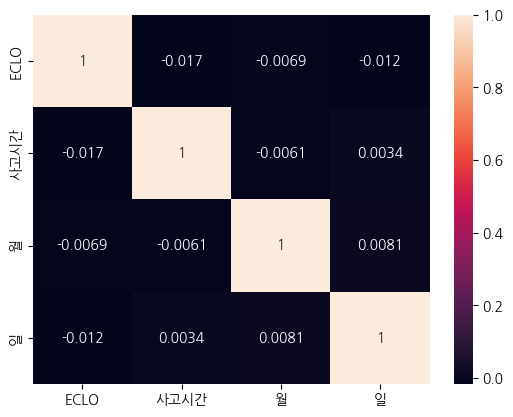

In [21]:
plt.rcParams['font.family'] = 'NanumGothic'
sns.heatmap(train_set.corr(), annot=True)
plt.show()

In [22]:
train_set.describe()

,ECLO,사고시간,월,일
count,39609.000000,39609.000000,39609.000000,39609.000000
mean,4.726704,13.934863,6.678507,15.817087
std,3.207206,5.626818,3.404229,8.792314
min,1.000000,0.000000,1.000000,1.000000
25%,3.000000,10.000000,4.000000,8.000000
50%,3.000000,15.000000,7.000000,16.000000
75%,6.000000,18.000000,10.000000,23.000000
max,74.000000,23.000000,12.000000,31.000000


In [23]:
graph_counter = Counter(train_set['ECLO'])
graph_y = [graph_counter[i] for i in sorted(graph_counter.keys())]

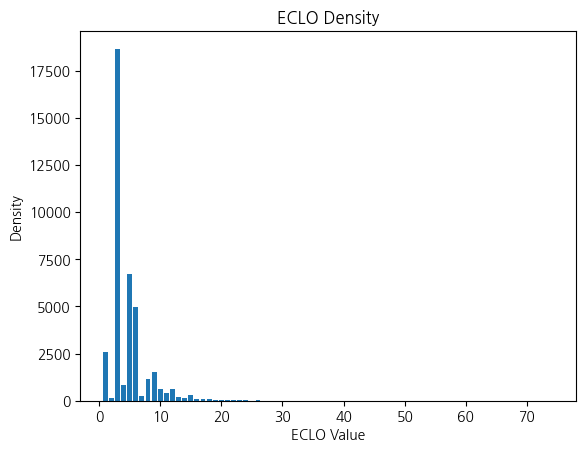

In [24]:
plt.bar(sorted(list(Counter(train_set['ECLO']).keys())), graph_y)
plt.xlabel('ECLO Value')
plt.ylabel('Density')
plt.title('ECLO Density')
plt.show()

In [25]:
graph_day = Counter(train_set['요일'])
graph_day

Counter({1: 6023, 2: 5969, 3: 5759, 4: 6179, 5: 5670, 6: 4114, 0: 5895})

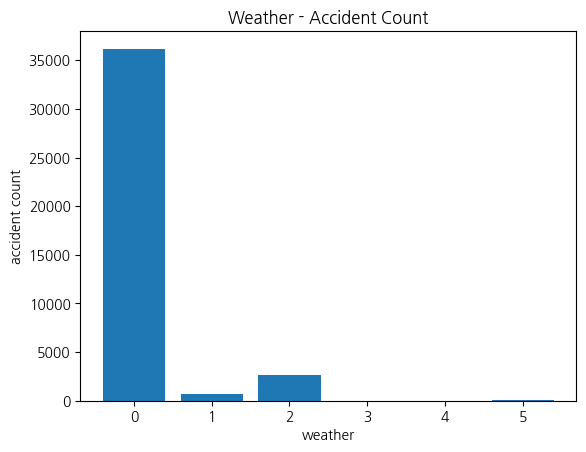

In [26]:
graph_weather = Counter(train_set['기상상태'])
plt.bar(graph_weather.keys(), [graph_weather[i] for i in graph_weather.keys()])
plt.xlabel('weather')
plt.ylabel('accident count')
plt.title('Weather - Accident Count')
plt.show()

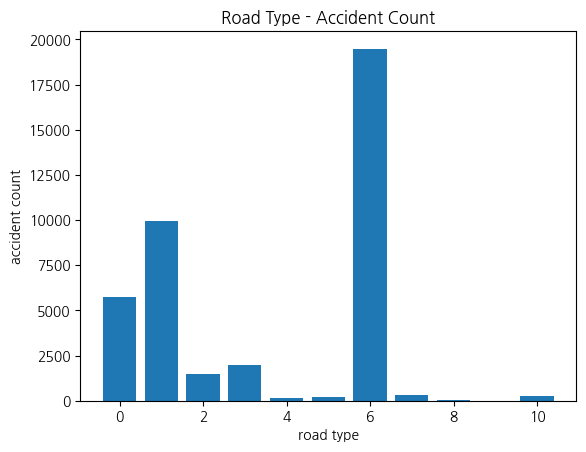

In [27]:
graph_road_type = Counter(train_set['도로형태'])
plt.bar(graph_road_type.keys(), [graph_road_type[i] for i in graph_road_type.keys()])
plt.xlabel('road type')
plt.ylabel('accident count')
plt.title('Road Type - Accident Count')
plt.show()

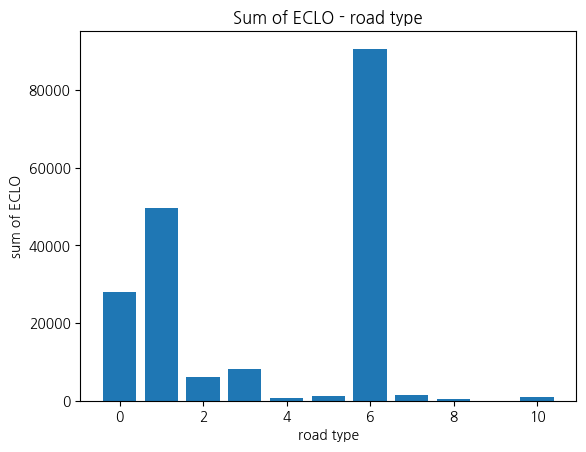

In [28]:
plt.bar(graph_road_type.keys(), [sum(train_set['ECLO'][train_set['도로형태']==i]) for i in graph_road_type.keys()])
plt.xlabel('road type')
plt.ylabel('sum of ECLO')
plt.title('Sum of ECLO - road type')
plt.show()

/home/chms/.local/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


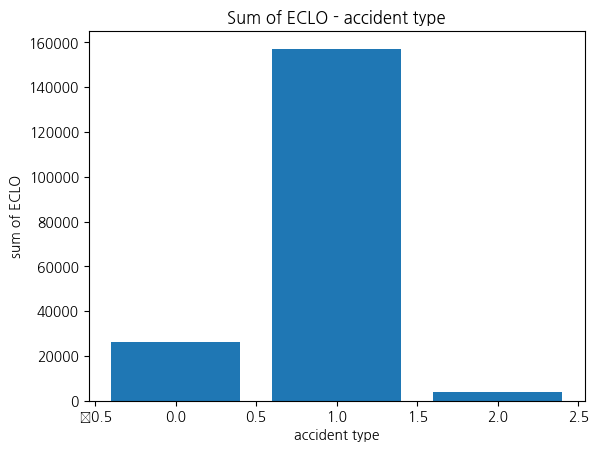

In [29]:
plt.bar(range(3), [sum(train_set['ECLO'][train_set['사고유형']==i]) for i in range(3)])
plt.xlabel('accident type')
plt.ylabel('sum of ECLO')
plt.title('Sum of ECLO - accident type')
plt.show()

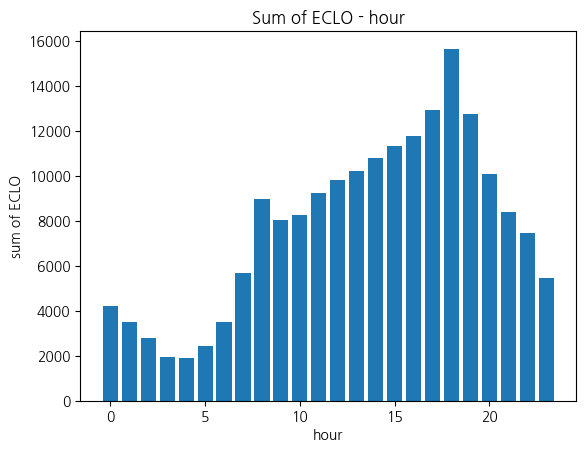

In [30]:
plt.bar(range(24), [sum(train_set['ECLO'][train_set['사고시간']==i]) for i in range(24)])
plt.xlabel('hour')
plt.ylabel('sum of ECLO')
plt.title('Sum of ECLO - hour')
plt.show()

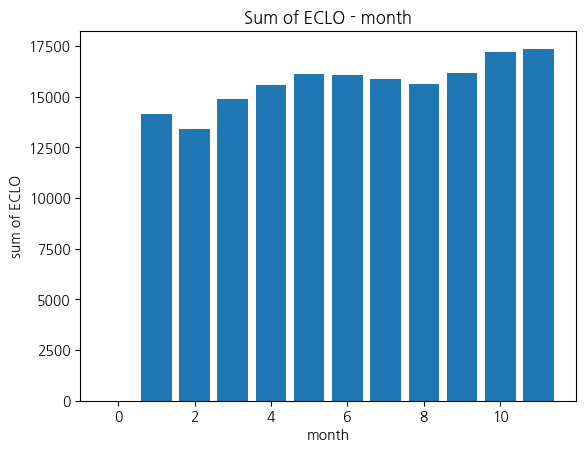

In [31]:
plt.bar(range(12), [sum(train_set['ECLO'][train_set['월']==i]) for i in range(12)])
plt.xlabel('month')
plt.ylabel('sum of ECLO')
plt.title('Sum of ECLO - month')
plt.show()

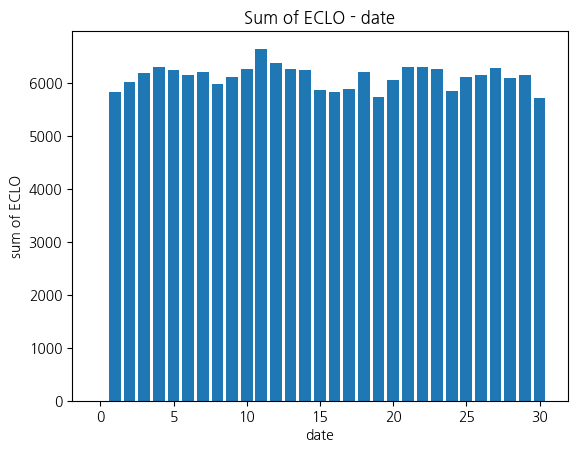

In [32]:
plt.bar(range(31), [sum(train_set['ECLO'][train_set['일']==i]) for i in range(31)])
plt.xlabel('date')
plt.ylabel('sum of ECLO')
plt.title('Sum of ECLO - date')
plt.show()